In [1]:
%run preamble.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# Simulated Data
#
DS_NAME ="Simulated Latencies"

N = 1000
batches_sim = [0]*N
for i in range(N):
    batch_size = np.random.geometric(.001)
    batches_sim[i] = [0] * batch_size
    for j in range(batch_size):
        a = np.random.uniform(.5, 5)
        s = np.random.exponential(0.1)
        x = np.random.exponential(0.01)
        batches_sim[i][j] = x + s*np.random.pareto(a)       

DS_DATA = batches_sim
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

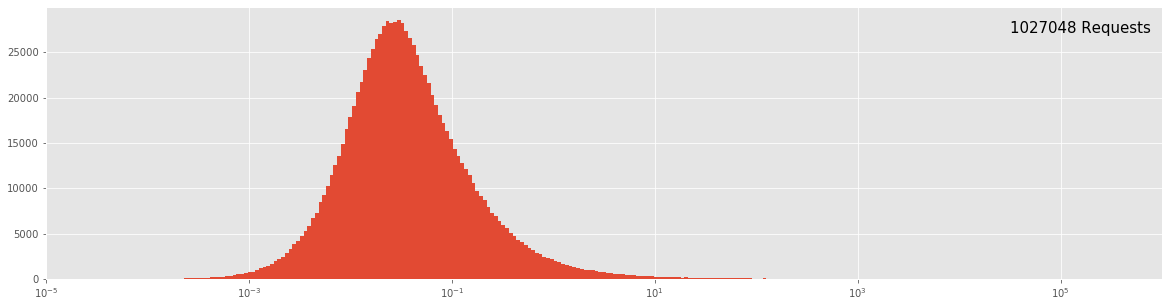

In [3]:
total = np.concatenate(DS_DATA)
ax = log_plot(total, [], xmin=1e-5)
plt.savefig("images/" + DS_NAME + "_distribution")

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

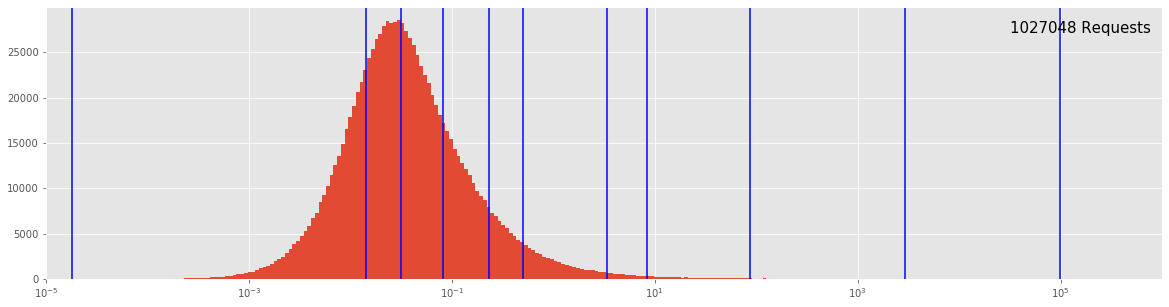

In [6]:
log_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ], xmin=1e-5)
# plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

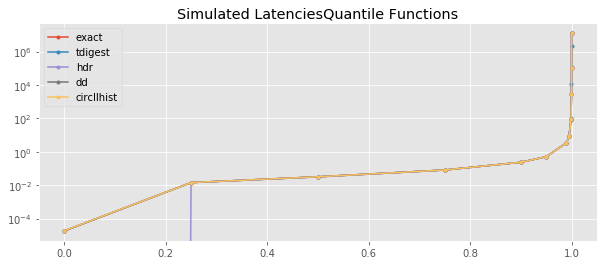

In [7]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.yscale("log")
plt.savefig("images/" + DS_NAME + "_quantile_comparison")

In [8]:
df

,exact,tdigest,hdr,dd,circllhist
q0,1.807292e-05,1.807292e-05,0.000000e+00,1.807292e-05,1.850000e-05
q.25,1.423165e-02,1.423191e-02,1.400000e-02,1.426150e-02,1.423512e-02
q.5,3.174789e-02,3.176279e-02,3.100000e-02,3.174040e-02,3.175103e-02
q.75,8.082383e-02,8.096335e-02,8.000000e-02,8.125738e-02,8.083827e-02
q.9,2.346021e-01,2.354149e-01,2.340000e-01,2.345472e-01,2.348875e-01
q.95,5.059976e-01,5.105531e-01,5.060000e-01,5.015395e-01,5.060201e-01
q.99,3.393659e+00,3.468524e+00,3.395000e+00,3.421199e+00,3.394275e+00
q.995,8.423584e+00,9.404512e+00,8.431000e+00,8.415044e+00,8.420408e+00
q.999,8.640747e+01,1.072208e+02,8.659100e+01,8.563536e+01,8.645455e+01
q.9999,2.929415e+03,1.195355e+04,2.930687e+03,2.951936e+03,2.933333e+03


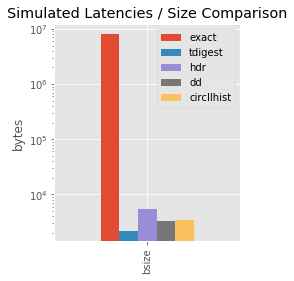

In [9]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.ylabel("bytes")
plt.title(DS_NAME + " / Size Comparison")
plt.savefig("images/" + DS_NAME + "_size")

In [10]:
df

,exact,tdigest,hdr,dd,circllhist
bsize,8216545,2144,5550.0,3324,3381.0


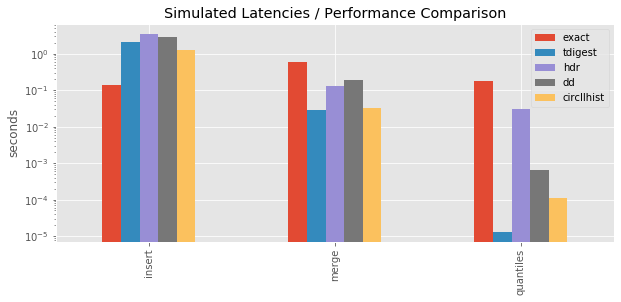

In [11]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.ylabel("seconds")
plt.title(DS_NAME + " / Performance Comparison")
plt.savefig("images/" + DS_NAME + "_perf")

In [12]:
df

,exact,tdigest,hdr,dd,circllhist
insert,0.140707,2.035045,3.439048,2.816022,1.245044
merge,0.604820,0.028138,0.127971,0.184135,0.031901
quantiles,0.178599,0.000013,0.030382,0.000654,0.000109


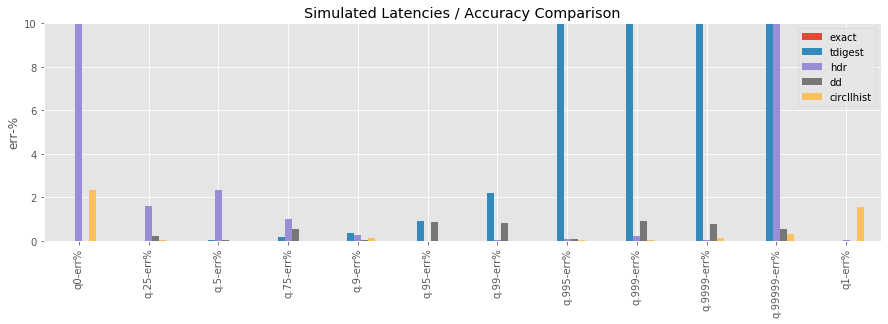

In [13]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)

plt.yscale("linear")
plt.ylabel("err-%")
plt.ylim(0, 10)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")

In [14]:
df

,exact,tdigest,hdr,dd,circllhist
q0-err%,0.0,0.000000,100.000000,0.000000,2.363068
q.25-err%,0.0,0.001796,1.627737,0.209717,0.024367
q.5-err%,0.0,0.046939,2.355712,0.023593,0.009900
q.75-err%,0.0,0.172624,1.019292,0.536408,0.017864
q.9-err%,0.0,0.346437,0.256665,0.023410,0.121646
q.95-err%,0.0,0.900305,0.000482,0.881053,0.004448
q.99-err%,0.0,2.206043,0.039518,0.811509,0.018149
q.995-err%,0.0,11.645016,0.088039,0.101387,0.037702
q.999-err%,0.0,24.087465,0.212398,0.893566,0.054478
q.9999-err%,0.0,308.052624,0.043437,0.768788,0.133774
